# Exploratory analysis

Initial code for exploratory for FSDS Data+PolicyBriefing assignment

By: Andres Restrepo

## Libraries

In [40]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import fiona
import requests
#import base64

## Reading the data

### Reading the Airbnb data

#### Reading localy

##### 2020

In [41]:
air_2020 = pd.read_csv("data/raw/listings-2020.csv.gz", compression='gzip', low_memory=False)
print(f"Data frame is {air_2020.shape[0]:,} x {air_2020.shape[1]}")

Data frame is 74,188 x 74


###### Inspecting

In [42]:
air_2020.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551.0,https://www.airbnb.com/rooms/11551,20200824024753,2020-08-26,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,Not even 10 minutes by metro from Victoria Sta...,https://a0.muscache.com/pictures/b7afccf4-18e5...,43039.0,https://www.airbnb.com/users/show/43039,...,10.0,9.0,9.0,NaN,t,2.0,2.0,0.0,0.0,1.51
1,13913.0,https://www.airbnb.com/rooms/13913,20200824024753,2020-08-27,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/ffb507b7-983c...,54730.0,https://www.airbnb.com/users/show/54730,...,10.0,9.0,9.0,NaN,f,3.0,1.0,2.0,0.0,0.17
2,15400.0,https://www.airbnb.com/rooms/15400,20200824024753,2020-08-26,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302.0,https://www.airbnb.com/users/show/60302,...,10.0,10.0,9.0,NaN,t,1.0,1.0,0.0,0.0,0.68
3,17402.0,https://www.airbnb.com/rooms/17402,20200824024753,2020-08-27,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564.0,https://www.airbnb.com/users/show/67564,...,9.0,10.0,9.0,NaN,t,14.0,14.0,0.0,0.0,0.37
4,17506.0,https://www.airbnb.com/rooms/17506,20200824024753,2020-08-26,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Fulham is 'villagey' and residential – a real ...,https://a0.muscache.com/pictures/11901327/e63d...,67915.0,https://www.airbnb.com/users/show/67915,...,NaN,NaN,NaN,NaN,f,2.0,0.0,2.0,0.0,NaN


##### Describing

In [43]:
air_2020.describe()

,id,host_id,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,beds,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.418600e+04,7.418800e+04,74175.000000,2.000000,74186.000000,74186.000000,74186.000000,2.000000,73199.000000,74186.000000,...,52194.000000,52234.000000,52197.000000,52196.000000,0.0,74184.000000,74184.000000,74184.000000,74184.000000,53901.000000
mean,2.524026e+07,9.403591e+07,22.460775,570.000000,51.508588,-0.128352,3.129755,570.000000,1.729218,4.957067,...,9.640744,9.662921,9.551871,9.281478,NaN,17.023401,14.269047,2.169484,0.045239,0.720166
std,1.292372e+07,9.804038e+07,115.784574,784.888527,0.261351,0.095638,1.989834,784.888527,1.289836,21.145133,...,0.923870,0.913548,0.856592,1.072651,NaN,76.759048,74.269755,13.894196,0.625069,0.949437
min,1.155100e+04,1.000000e+00,0.000000,15.000000,2.000000,-0.496250,1.000000,15.000000,0.000000,0.000000,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.504579e+07,1.578421e+07,1.000000,292.500000,51.484940,-0.189120,2.000000,292.500000,1.000000,1.000000,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.140000
50%,2.576235e+07,4.911094e+07,1.000000,570.000000,51.514070,-0.126570,2.000000,570.000000,1.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.380000
75%,3.697921e+07,1.529342e+08,4.000000,847.500000,51.538410,-0.069660,4.000000,847.500000,2.000000,3.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,4.000000,2.000000,1.000000,0.000000,0.940000
max,4.509040e+07,3.639824e+08,1309.000000,1125.000000,51.681690,2.000000,16.000000,1125.000000,28.000000,1125.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,718.000000,717.000000,230.000000,18.000000,20.000000


In [44]:
air_2020.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74188 entries, 0 to 74187
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            74186 non-null  float64
 1   listing_url                                   74187 non-null  object 
 2   scrape_id                                     74187 non-null  object 
 3   last_scraped                                  74187 non-null  object 
 4   name                                          74167 non-null  object 
 5   description                                   71329 non-null  object 
 6   neighborhood_overview                         47208 non-null  object 
 7   picture_url                                   74188 non-null  object 
 8   host_id                                       74188 non-null  float64
 9   host_url                                      74188 non-null 

##### Profiling longitude and latitude

In [45]:
profile = ProfileReport(air_2020[["latitude", "longitude",'property_type','room_type']], title="Pandas Profiling Report") #To profile all the variables
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
air_2020[air_2020.latitude==2]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3559,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,https://a0.muscache.com/im/pictures/user/1c171...,Shoreditch,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29990,NaN,within an hour,100%,74%,f,https://a0.muscache.com/im/pictures/user/19315...,https://a0.muscache.com/im/pictures/user/19315...,Richmond,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
air_2020[air_2020.longitude==2]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3559,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/1c171...,https://a0.muscache.com/im/pictures/user/1c171...,Shoreditch,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29990,NaN,within an hour,100%,74%,f,https://a0.muscache.com/im/pictures/user/19315...,https://a0.muscache.com/im/pictures/user/19315...,Richmond,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
air_2020[air_2020.longitude.isna()]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3558,3138549.0,https://www.airbnb.com/rooms/3138549,20200824024753,2020-08-26,Heart of City of London/Shoreditch,Our lovely flat is in a newly designed buildin...,"Old Street is in the heart of Shoreditch, with...",https://a0.muscache.com/pictures/ed787e5d-730c...,4968944.0,https://www.airbnb.com/users/show/4968944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29989,21549106.0,https://www.airbnb.com/rooms/21549106,20200824024753,2020-08-27,"Richmond Luxury, High ceilings & Free Parking",Welcome to my Richmond (not East Twickenham) b...,Richmond is famous for its Royal parks & impre...,https://a0.muscache.com/pictures/355d8a17-8d9e...,123942428.0,https://www.airbnb.com/users/show/123942428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
air_2020[air_2020.latitude.isna()]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
3558,3138549.0,https://www.airbnb.com/rooms/3138549,20200824024753,2020-08-26,Heart of City of London/Shoreditch,Our lovely flat is in a newly designed buildin...,"Old Street is in the heart of Shoreditch, with...",https://a0.muscache.com/pictures/ed787e5d-730c...,4968944.0,https://www.airbnb.com/users/show/4968944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29989,21549106.0,https://www.airbnb.com/rooms/21549106,20200824024753,2020-08-27,"Richmond Luxury, High ceilings & Free Parking",Welcome to my Richmond (not East Twickenham) b...,Richmond is famous for its Royal parks & impre...,https://a0.muscache.com/pictures/355d8a17-8d9e...,123942428.0,https://www.airbnb.com/users/show/123942428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Droping rows

In [50]:
air_2020.drop(air_2020[(air_2020.latitude==2) | (air_2020.longitude==2)|(air_2020.latitude.isna())|(air_2020.longitude.isna())].index.array, axis=0, inplace=True)
print(f"Data frame is now {air_2020.shape[0]:,} x {air_2020.shape[1]}")

Data frame is now 74,184 x 74


##### Property type

In [51]:
cats = ['property_type','room_type']
air_2020.sample(5, random_state=42)[cats]

,property_type,room_type
66121,Room in boutique hotel,Hotel room
58701,Entire apartment,Entire home/apt
53195,Private room in apartment,Private room
64796,Entire apartment,Entire home/apt
46074,Private room in apartment,Private room


In [52]:
air_2020[cats[0]].value_counts()

Entire apartment             31459
Private room in apartment    17146
Private room in house        10757
Entire house                  5317
Private room in townhouse     1539
                             ...  
Private room in camper/rv        1
Earth house                      1
Shared room in bus               1
Private room in floor            1
Dome house                       1
Name: property_type, Length: 91, dtype: int64

In [53]:
air_2020[cats[1]].value_counts()

Entire home/apt    40853
Private room       32163
Shared room          592
Hotel room           576
Name: room_type, dtype: int64

Converting to categorical variables

In [54]:
for c in cats:
    print(f"Converting {c}")
    air_2020[c] = air_2020[c].astype('category')

Converting property_type
Converting room_type


In [55]:
print(air_2020[cats[0]].cat.categories.values)

['Barn' 'Boat' 'Camper/RV' 'Campsite' 'Casa particular' 'Dome house'
 'Earth house' 'Entire apartment' 'Entire bungalow' 'Entire cabin'
 'Entire chalet' 'Entire condominium' 'Entire cottage' 'Entire floor'
 'Entire guest suite' 'Entire guesthouse' 'Entire home/apt' 'Entire house'
 'Entire loft' 'Entire place' 'Entire serviced apartment'
 'Entire townhouse' 'Entire villa' 'Houseboat' 'Hut' 'Island' 'Lighthouse'
 'Private room' 'Private room in apartment'
 'Private room in bed and breakfast' 'Private room in boat'
 'Private room in bungalow' 'Private room in bus' 'Private room in cabin'
 'Private room in camper/rv' 'Private room in casa particular'
 'Private room in casa particular (cuba)' 'Private room in castle'
 'Private room in chalet' 'Private room in condominium'
 'Private room in cottage' 'Private room in dome house'
 'Private room in earth house' 'Private room in farm stay'
 'Private room in floor' 'Private room in guest suite'
 'Private room in guesthouse' 'Private room in hoste

In [56]:
print(air_2020[cats[1]].cat.categories.values)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


Grouping by categorical variables

In [57]:
air_2020.groupby('room_type')['property_type'].value_counts()

room_type                                 
Entire home/apt  Entire apartment             31459
                 Entire house                  5317
                 Entire condominium            1164
                 Entire townhouse               966
                 Entire serviced apartment      838
                                              ...  
Shared room      Private room in apartment        0
                 Private room                     0
                 Lighthouse                       0
                 Island                           0
                 Yurt                             0
Name: property_type, Length: 364, dtype: int64

In [58]:
air_2020[air_2020.room_type=='Entire home/apt'].shape[0]

40853

In [59]:
print(f"There are {(air_2020[air_2020.room_type=='Entire home/apt'].shape[0]):,} Airbnb listings for entire properties in London in the year 2020.")

There are 40,853 Airbnb listings for entire properties in London in the year 2020.


##### Reading geo data frame

In [60]:
geo_air_2020 = gpd.GeoDataFrame(air_2020, geometry=gpd.points_from_xy(air_2020.longitude, air_2020.latitude), crs="EPSG:4326")

In [61]:
geo_air_2020.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74184 entries, 0 to 74187
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            74184 non-null  float64 
 1   listing_url                                   74184 non-null  object  
 2   scrape_id                                     74184 non-null  object  
 3   last_scraped                                  74184 non-null  object  
 4   name                                          74163 non-null  object  
 5   description                                   71325 non-null  object  
 6   neighborhood_overview                         47204 non-null  object  
 7   picture_url                                   74184 non-null  object  
 8   host_id                                       74184 non-null  float64 
 9   host_url                                  

In [62]:
print(geo_air_2020.crs)

EPSG:4326


In [63]:
geo_air_2020.to_crs(crs="EPSG:27700",inplace=True)
print(geo_air_2020.crs)

EPSG:27700


In [64]:
print(f"The bottom-left corner is {geo_air_2020.longitude.min()}, {geo_air_2020.longitude.max()}")
print(f"The top-right corner is {geo_air_2020.latitude.min()}, {geo_air_2020.latitude.max()}")

The bottom-left corner is -0.49625, 0.2845
The top-right corner is 51.29479, 51.68169


##### Plotting

<AxesSubplot:>

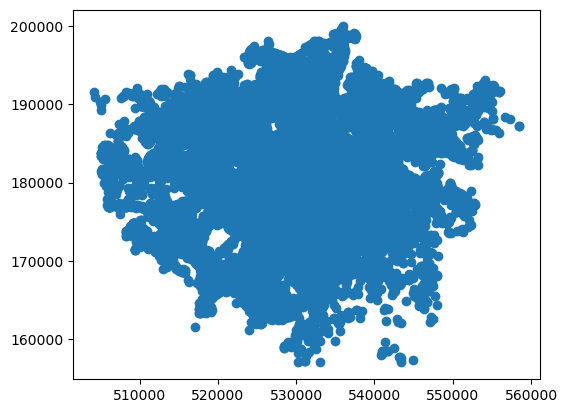

In [65]:
geo_air_2020.plot()

##### 2022

In [66]:
air_2022 = pd.read_csv("data/raw/listings-2022.csv.gz", compression='gzip', low_memory=False)
print(f"Data frame is {air_2022.shape[0]:,} x {air_2022.shape[1]}")

Data frame is 69,351 x 75


###### Inspecting

In [67]:
air_2022.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20220910194334,2022-09-11,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.93,4.75,4.82,NaN,f,2,1,1,0,0.20
1,15400,https://www.airbnb.com/rooms/15400,20220910194334,2022-09-11,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.57
2,284532,https://www.airbnb.com/rooms/284532,20220910194334,2022-09-11,city scrape,COSY STUDIO-FLAT WITH A GREAT VIEW,My very RECENTLY RENOVATED flat is located in ...,Shoreditch is simply the coolest area in London!,https://a0.muscache.com/pictures/2932872/00037...,1481412,...,4.86,4.72,4.31,NaN,f,1,1,0,0,0.34
3,106332,https://www.airbnb.com/rooms/106332,20220910194334,2022-09-11,city scrape,"Lovely large room, Bethnal Green",Lovely characterful room in a house belonging ...,NaN,https://a0.muscache.com/pictures/82437180/20b7...,264345,...,4.93,4.92,4.83,NaN,f,1,0,1,0,0.47
4,17402,https://www.airbnb.com/rooms/17402,20220910194334,2022-09-11,city scrape,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,...,4.69,4.88,4.59,NaN,f,5,5,0,0,0.36


##### Describing

In [68]:
air_2022.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.935100e+04,6.935100e+04,6.935100e+04,69346.000000,69346.000000,0.0,69351.000000,69351.000000,69351.000000,0.0,...,51515.000000,51548.000000,51517.000000,51514.000000,0.0,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000
mean,1.373703e+17,2.022091e+13,1.242124e+08,31.047112,54.256035,NaN,51.509544,-0.128489,3.075255,NaN,...,4.790880,4.803499,4.739017,4.620849,NaN,11.987498,9.001355,2.811437,0.031391,0.882593
std,2.651479e+17,6.796924e-01,1.377104e+08,180.459655,336.219638,NaN,0.049182,0.100957,1.940233,NaN,...,0.454214,0.453838,0.420715,0.519731,NaN,37.148839,31.697957,15.762046,0.506464,1.274510
min,1.391300e+04,2.022091e+13,4.775000e+03,1.000000,1.000000,NaN,51.272480,-0.523600,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.810090e+07,2.022091e+13,1.870718e+07,1.000000,1.000000,NaN,51.483140,-0.189520,2.000000,NaN,...,4.770000,4.800000,4.670000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.120000
50%,3.395467e+07,2.022091e+13,6.010350e+07,2.000000,2.000000,NaN,51.513600,-0.126200,2.000000,NaN,...,4.950000,4.980000,4.860000,4.750000,NaN,1.000000,1.000000,0.000000,0.000000,0.430000
75%,5.265645e+07,2.022091e+13,1.960405e+08,5.000000,7.000000,NaN,51.539710,-0.068550,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,2.000000,1.000000,0.000000,1.080000
max,7.123951e+17,2.022091e+13,4.788540e+08,2157.000000,23950.000000,NaN,51.708930,0.305150,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,285.000000,282.000000,219.000000,19.000000,51.330000


In [69]:
air_2022.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

##### Profiling longitude and latitude

In [70]:
profile = ProfileReport(air_2022[["latitude", "longitude",'property_type','room_type']], title="Pandas Profiling Report") #To profile all the variables
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
air_2022[air_2022.latitude==2]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [72]:
air_2022[air_2022.longitude==2]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [73]:
air_2022[air_2022.longitude.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [74]:
air_2022[air_2022.latitude.isna()]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


##### Droping rows

In [75]:
# There are not rows to drop.
print(f"Data frame is now {air_2022.shape[0]:,} x {air_2022.shape[1]}")

Data frame is now 69,351 x 75


##### Property type

In [76]:
cats = ['property_type','room_type']
air_2022.sample(5, random_state=42)[cats]

,property_type,room_type
26643,Private room in rental unit,Private room
15713,Entire rental unit,Entire home/apt
67606,Entire home,Entire home/apt
40703,Entire rental unit,Entire home/apt
625,Entire rental unit,Entire home/apt


In [77]:
air_2022[cats[0]].value_counts()

Entire rental unit             22780
Private room in rental unit    12133
Entire condo                    8676
Private room in home            8500
Entire home                     5379
                               ...  
Shared room in earthen home        1
Shared room in villa               1
Yurt                               1
Shared room in bus                 1
Bus                                1
Name: property_type, Length: 100, dtype: int64

In [78]:
air_2022[cats[1]].value_counts()

Entire home/apt    41224
Private room       27479
Shared room          404
Hotel room           244
Name: room_type, dtype: int64

Converting to categorical variables

In [79]:
for c in cats:
    print(f"Converting {c}")
    air_2022[c] = air_2022[c].astype('category')

Converting property_type
Converting room_type


In [80]:
print(air_2022[cats[0]].cat.categories.values)

['Barn' 'Boat' 'Bus' 'Camper/RV' 'Campsite' 'Casa particular' 'Castle'
 'Dome' 'Earthen home' 'Entire bungalow' 'Entire cabin' 'Entire chalet'
 'Entire condo' 'Entire cottage' 'Entire guest suite' 'Entire guesthouse'
 'Entire home' 'Entire home/apt' 'Entire loft' 'Entire place'
 'Entire rental unit' 'Entire serviced apartment' 'Entire townhouse'
 'Entire vacation home' 'Entire villa' 'Floor' 'Houseboat' 'Hut' 'Island'
 'Minsu' 'Private room' 'Private room in bed and breakfast'
 'Private room in boat' 'Private room in bungalow' 'Private room in cabin'
 'Private room in camper/rv' 'Private room in casa particular'
 'Private room in castle' 'Private room in chalet' 'Private room in condo'
 'Private room in cottage' 'Private room in earthen home'
 'Private room in farm stay' 'Private room in floor'
 'Private room in guest suite' 'Private room in guesthouse'
 'Private room in home' 'Private room in hostel'
 'Private room in houseboat' 'Private room in hut'
 'Private room in island' 'Private

In [81]:
print(air_2022[cats[1]].cat.categories.values)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


Grouping by categorical variables

In [83]:
air_2022.groupby('room_type')['property_type'].value_counts()

room_type                                 
Entire home/apt  Entire rental unit           22780
                 Entire condo                  8676
                 Entire home                   5379
                 Entire serviced apartment     1829
                 Entire townhouse              1121
                                              ...  
Shared room      Private room                     0
                 Minsu                            0
                 Island                           0
                 Hut                              0
                 Yurt                             0
Name: property_type, Length: 400, dtype: int64

In [84]:
air_2022[air_2022.room_type=='Entire home/apt'].shape[0]

41224

In [85]:
print(f"There are {(air_2022[air_2022.room_type=='Entire home/apt'].shape[0]):,} Airbnb listings for entire properties in London in the year 2022.")
print(f"Compared to the year 2020, the number of listings for entire properties in London has varied in {((air_2022[air_2022.room_type=='Entire home/apt'].shape[0])-(air_2020[air_2020.room_type=='Entire home/apt'].shape[0]))}. This variations represent a percentage change of {(((air_2022[air_2022.room_type=='Entire home/apt'].shape[0])-(air_2020[air_2020.room_type=='Entire home/apt'].shape[0]))/((air_2020[air_2020.room_type=='Entire home/apt'].shape[0]))):.2%}")

There are 41,224 Airbnb listings for entire properties in London in the year 2022.
Compared to the year 2020, the number of listings for entire properties in London has varied in 371. This variations represent a percentage change of 0.91%


##### Reading geo data frame

In [86]:
geo_air_2020 = gpd.GeoDataFrame(air_2020, geometry=gpd.points_from_xy(air_2020.longitude, air_2020.latitude), crs="EPSG:4326")

In [87]:
geo_air_2020.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74184 entries, 0 to 74187
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            74184 non-null  float64 
 1   listing_url                                   74184 non-null  object  
 2   scrape_id                                     74184 non-null  object  
 3   last_scraped                                  74184 non-null  object  
 4   name                                          74163 non-null  object  
 5   description                                   71325 non-null  object  
 6   neighborhood_overview                         47204 non-null  object  
 7   picture_url                                   74184 non-null  object  
 8   host_id                                       74184 non-null  float64 
 9   host_url                                  

In [88]:
print(geo_air_2020.crs)

EPSG:4326


In [89]:
geo_air_2020.to_crs(crs="EPSG:27700",inplace=True)
print(geo_air_2020.crs)

EPSG:27700


In [90]:
print(f"The bottom-left corner is {geo_air_2020.longitude.min()}, {geo_air_2020.longitude.max()}")
print(f"The top-right corner is {geo_air_2020.latitude.min()}, {geo_air_2020.latitude.max()}")

The bottom-left corner is -0.49625, 0.2845
The top-right corner is 51.29479, 51.68169


##### Plotting

<AxesSubplot:>

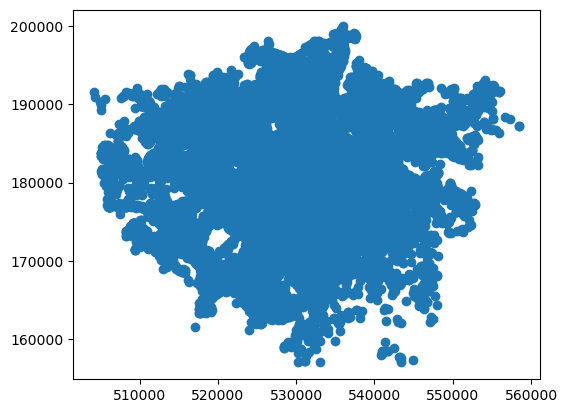

In [91]:
geo_air_2020.plot()

#### Reading directly from One drive (not working)

def create_onedrive_directdownload (onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

onedrive_link='https://liveuclac-my.sharepoint.com/:u:/r/personal/ucfnant_ucl_ac_uk/Documents/CASA0013_Foundations%20of%20Spatial%20Data%20Science/BraCoChi/Data/Airbnb/raw/listings-2020.csv.gz?csf=1&web=1&e=dEpHPI'
onedrive_direct_link=create_onedrive_directdownload (onedrive_link)
print(f"Original Onedrive Link: {onedrive_link}")
print(f"Generated direct download link: {onedrive_direct_link}")
air_2020 = pd.read_csv(onedrive_direct_link, compression='gzip', low_memory=False)
print(f"Data frame is {air_2020.shape[0]:,} x {air_2020.shape[1]}")

### Reading the TFL data

#### Reading KML file in TFL API

In [ ]:
response = requests.get("https://api.tfl.gov.uk/stationdata/tfl-stationdata-detailed.zip")
print(response.status_code)

In [ ]:
print(response.json())

In [ ]:
type(tfl_stations)

##### Adjusting the CRS

In [ ]:
print(tfl_stations.crs)

In [ ]:
tfl_stations.to_crs(crs="EPSG:27700",inplace=True)
print(tfl_stations.crs)

In [ ]:
tfl_stations

## Subsetting the listings data

## Geographical summerizing

### Counting listings

## Descriptive analytics

## Visualizing the data